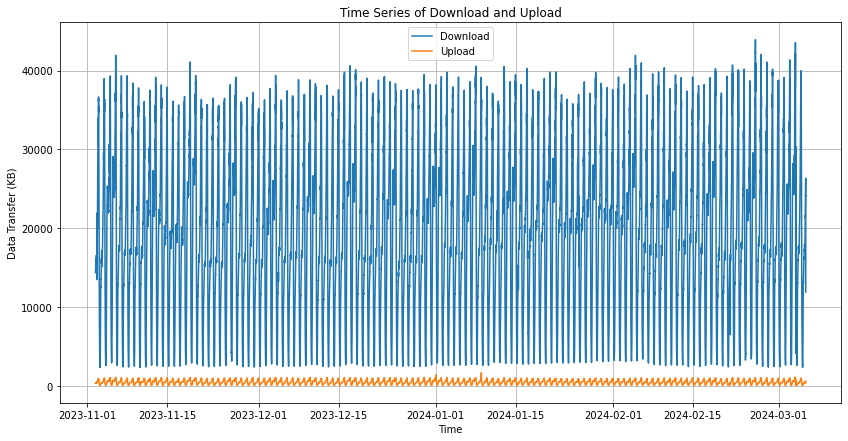

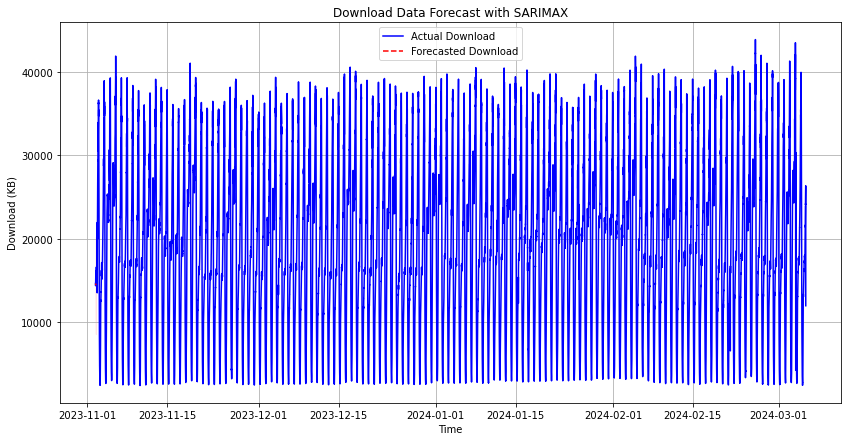

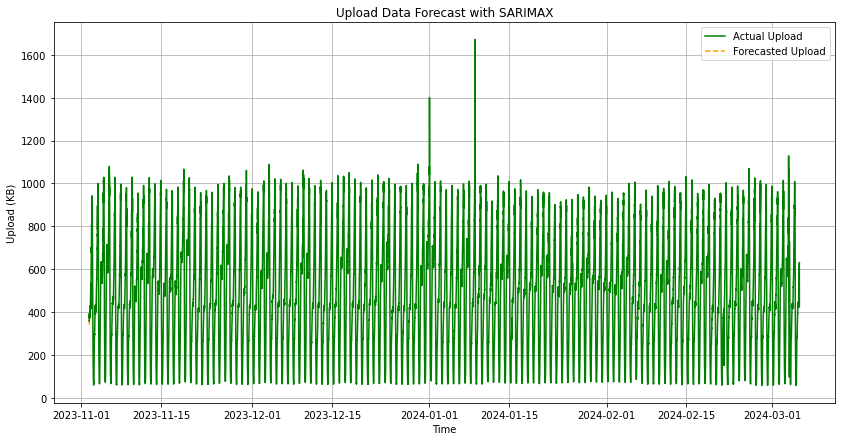

Timestamp 2024-03-05 18:25:00 not found in the forecast data.


In [114]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

file_path = 'hackathon 2024 - Yapay Zeka.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

data['TIME_STAMP'] = pd.to_datetime(data['TIME_STAMP'])
data.set_index('TIME_STAMP', inplace=True)

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['DOWNLOAD'], label='Download')
plt.plot(data.index, data['UPLOAD'], label='Upload')
plt.xlabel('Time')
plt.ylabel('Data Transfer (KB)')
plt.title('Time Series of Download and Upload')
plt.legend()
plt.grid(True)
plt.show()

# Define a function to fit SARIMAX model and forecast
def fit_sarimax(data, order, steps=12):
    model = SARIMAX(data, order=order, enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit(disp=False)
    forecast = results.get_forecast(steps=steps)
    return forecast.predicted_mean, forecast.conf_int()

# Fit the SARIMAX model for DOWNLOAD data
order_download = (1, 1, 1)
download_forecast, download_conf_int = fit_sarimax(data['DOWNLOAD'], order_download)

# Fit the SARIMAX model for UPLOAD data
order_upload = (1, 1, 1)
upload_forecast, upload_conf_int = fit_sarimax(data['UPLOAD'], order_upload)

# Generate future dates
future_dates = pd.date_range(start=data.index[-1], periods=13, freq='5min')[1:]

# Manually create the forecast DataFrames
forecast_download_df = pd.DataFrame({'Forecasted_Download': download_forecast.values}, index=future_dates)
forecast_upload_df = pd.DataFrame({'Forecasted_Upload': upload_forecast.values}, index=future_dates)

# Combine actual data and forecasted data
combined_download_df = pd.concat([data['DOWNLOAD'], forecast_download_df])
combined_upload_df = pd.concat([data['UPLOAD'], forecast_upload_df])

# Manually create the confidence interval DataFrames
download_conf_int_df = pd.DataFrame(download_conf_int.values, columns=['lower y', 'upper y'], index=future_dates)
upload_conf_int_df = pd.DataFrame(upload_conf_int.values, columns=['lower y', 'upper y'], index=future_dates)

# Plot the forecasts with corrected indices and data types
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['DOWNLOAD'], label='Actual Download', color='blue')
plt.plot(future_dates, forecast_download_df['Forecasted_Download'], label='Forecasted Download', linestyle='--', color='red')
plt.fill_between(future_dates, download_conf_int_df['lower y'], download_conf_int_df['upper y'], color='red', alpha=0.1)
plt.xlabel('Time')
plt.ylabel('Download (KB)')
plt.title('Download Data Forecast with SARIMAX')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['UPLOAD'], label='Actual Upload', color='green')
plt.plot(future_dates, forecast_upload_df['Forecasted_Upload'], label='Forecasted Upload', linestyle='--', color='orange')
plt.fill_between(future_dates, upload_conf_int_df['lower y'], upload_conf_int_df['upper y'], color='orange', alpha=0.1)
plt.xlabel('Time')
plt.ylabel('Upload (KB)')
plt.title('Upload Data Forecast with SARIMAX')
plt.legend()
plt.grid(True)
plt.show()

# Anomaly detection for the given timestamp
timestamp_to_check = pd.to_datetime('2024-03-05 18:25:00')

if timestamp_to_check in data.index:
    actual_download = data.loc[timestamp_to_check, 'DOWNLOAD']
    actual_upload = data.loc[timestamp_to_check, 'UPLOAD']
else:
    print(f"Timestamp {timestamp_to_check} not found in the data.")

if timestamp_to_check in forecast_download_df.index:
    forecasted_download = forecast_download_df.loc[timestamp_to_check, 'Forecasted_Download']
    forecasted_upload = forecast_upload_df.loc[timestamp_to_check, 'Forecasted_Upload']
    
    download_lower_bound = download_conf_int_df.loc[timestamp_to_check, 'lower y']
    download_upper_bound = download_conf_int_df.loc[timestamp_to_check, 'upper y']
    upload_lower_bound = upload_conf_int_df.loc[timestamp_to_check, 'lower y']
    upload_upper_bound = upload_conf_int_df.loc[timestamp_to_check, 'upper y']
    
    is_download_anomaly = not (download_lower_bound <= actual_download <= download_upper_bound)
    is_upload_anomaly = not (upload_lower_bound <= actual_upload <= upload_upper_bound)
    
    print(f"Actual Download at {timestamp_to_check}: {actual_download}")
    print(f"Forecasted Download at {timestamp_to_check}: {forecasted_download}")
    print(f"Download Confidence Interval: [{download_lower_bound}, {download_upper_bound}]")
    print(f"Is Download an Anomaly?: {'Yes' if is_download_anomaly else 'No'}")
    
    print(f"Actual Upload at {timestamp_to_check}: {actual_upload}")
    print(f"Forecasted Upload at {timestamp_to_check}: {forecasted_upload}")
    print(f"Upload Confidence Interval: [{upload_lower_bound}, {upload_upper_bound}]")
    print(f"Is Upload an Anomaly?: {'Yes' if is_upload_anomaly else 'No'}")
else:
    print(f"Timestamp {timestamp_to_check} not found in the forecast data.")
